In [1]:
#Necessary imports for this code to run smoothly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
df = pd.read_csv('combined_file_nrm_final.csv')

In [4]:
df

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
0,Godavari,NRM,NL,19,1,0.0,250.0,3.5,14.48,1.5,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
1,Godavari,NRM,NL,19,2,250.0,190.0,2.5,18.23,NaN,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
2,Godavari,NRM,NL,19,3,190.0,195.0,NaN,17.56,2.3,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
3,Godavari,NRM,NL,19,4,195.0,205.0,NaN,16.59,2.5,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
4,Godavari,NRM,NL,19,5,205.0,185.0,NaN,17.20,2.0,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,HRG,NRM,NL,65,77,160.0,130.0,3.0,5.32,NaN,...,0.50,3000.0,7300.0,500.0,0.0,46.84,NaN,3800.0,NaN,NaN
339,HRG,NRM,NL,65,78,130.0,150.0,2.8,6.10,NaN,...,0.55,2800.0,7750.0,550.0,0.0,50.07,NaN,4400.0,NaN,NaN
340,HRG,NRM,NL,65,79,150.0,250.0,3.5,5.21,NaN,...,0.40,3500.0,7700.0,400.0,0.0,43.45,NaN,3800.0,NaN,NaN
341,HRG,NRM,NL,65,80,250.0,200.0,3.0,6.05,NaN,...,0.50,3000.0,7900.0,500.0,0.0,48.63,NaN,4400.0,NaN,NaN


In [5]:
df = df[df['Scrap (MT)'].notna()]

In [7]:
df = df.reset_index(drop=True)

In [9]:
df = df[df['Input energy (KWH)'].notna()]

In [10]:
df = df.reset_index(drop=True)

In [11]:
df['Input energy previous (KWH)'].isna().sum()

4

In [13]:
df = df[df['Input energy previous (KWH)'].notna()]

In [14]:
df = df.reset_index(drop=True)

In [15]:
df

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
0,Godavari,NRM,NL,19,1,0.0,250.0,3.5,14.48,1.5,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
1,Godavari,NRM,NL,19,2,250.0,190.0,2.5,18.23,NaN,...,NaN,NaN,NaN,NaN,12.0,76.00,12.0,76.0,NaN,NaN
2,Godavari,NRM,NL,19,6,185.0,200.0,2.3,16.28,NaN,...,NaN,NaN,NaN,NaN,19.0,62.00,19.0,62.0,NaN,NaN
3,Godavari,NRM,NL,19,18,130.0,215.0,2.0,20.29,NaN,...,NaN,NaN,NaN,NaN,21.0,69.00,10.0,69.0,NaN,NaN
4,Godavari,NRM,NL,19,27,200.0,180.0,2.2,18.71,0.0,...,NaN,NaN,NaN,NaN,26.0,61.00,13.0,61.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,HRG,NRM,NL,65,77,160.0,130.0,3.0,5.32,NaN,...,0.50,3000.0,7300.0,500.0,0.0,46.84,NaN,3800.0,NaN,NaN
241,HRG,NRM,NL,65,78,130.0,150.0,2.8,6.10,NaN,...,0.55,2800.0,7750.0,550.0,0.0,50.07,NaN,4400.0,NaN,NaN
242,HRG,NRM,NL,65,79,150.0,250.0,3.5,5.21,NaN,...,0.40,3500.0,7700.0,400.0,0.0,43.45,NaN,3800.0,NaN,NaN
243,HRG,NRM,NL,65,80,250.0,200.0,3.0,6.05,NaN,...,0.50,3000.0,7900.0,500.0,0.0,48.63,NaN,4400.0,NaN,NaN


In [17]:
for col in  df.columns[3:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
df = df.fillna(0)

In [19]:
df

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
0,Godavari,NRM,NL,19,1,0.0,250.0,3.5,14.48,1.5,...,0.00,0.0,0.0,0.0,12.0,76.00,12.0,76.0,0.0,0.0
1,Godavari,NRM,NL,19,2,250.0,190.0,2.5,18.23,0.0,...,0.00,0.0,0.0,0.0,12.0,76.00,12.0,76.0,0.0,0.0
2,Godavari,NRM,NL,19,6,185.0,200.0,2.3,16.28,0.0,...,0.00,0.0,0.0,0.0,19.0,62.00,19.0,62.0,0.0,0.0
3,Godavari,NRM,NL,19,18,130.0,215.0,2.0,20.29,0.0,...,0.00,0.0,0.0,0.0,21.0,69.00,10.0,69.0,0.0,0.0
4,Godavari,NRM,NL,19,27,200.0,180.0,2.2,18.71,0.0,...,0.00,0.0,0.0,0.0,26.0,61.00,13.0,61.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,HRG,NRM,NL,65,77,160.0,130.0,3.0,5.32,0.0,...,0.50,3000.0,7300.0,500.0,0.0,46.84,0.0,3800.0,0.0,0.0
241,HRG,NRM,NL,65,78,130.0,150.0,2.8,6.10,0.0,...,0.55,2800.0,7750.0,550.0,0.0,50.07,0.0,4400.0,0.0,0.0
242,HRG,NRM,NL,65,79,150.0,250.0,3.5,5.21,0.0,...,0.40,3500.0,7700.0,400.0,0.0,43.45,0.0,3800.0,0.0,0.0
243,HRG,NRM,NL,65,80,250.0,200.0,3.0,6.05,0.0,...,0.50,3000.0,7900.0,500.0,0.0,48.63,0.0,4400.0,0.0,0.0


In [20]:
df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)



#Threshold for total heat time
threshold = 250

for i in range(df.shape[0]):
    if(df.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df.loc[i,'Total Heat Time (minutes)']>threshold):
        df.loc[i,'Total Heat Time (minutes)']= threshold
        
#Units conversion 
df['Input energy previous (KWH)'] = df['Power previous']*df['Total Heat Time previous (minutes)']/60
df['Input energy (KWH)'] = df['Power']*df['Total Heat Time (minutes)']/60

In [21]:
#Units conversion 
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000
df['Pig iron addition (MT) '] = df['Pig iron addition (MT) ']*1000

In [23]:
np.unique(df['Customer Name'])

array(['BMM', 'Godavari', 'HRG', 'Hind Coil', 'MSP'], dtype=object)

In [24]:
df[df['Customer Name']=='HRG']

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
164,HRG,NRM,NL,65,4,150.0,150.0,3200.0,4740.0,0.0,...,520.0,3200.0,7020.0,520.0,0.0,41.17,0.0,3300.0,0.0,0.0
165,HRG,NRM,NL,65,5,150.0,25.0,2500.0,6040.0,0.0,...,500.0,2500.0,7400.0,500.0,0.0,52.93,0.0,4400.0,0.0,0.0
166,HRG,NRM,NL,65,6,25.0,250.0,2300.0,6210.0,0.0,...,650.0,2300.0,7350.0,650.0,0.0,53.77,0.0,4400.0,0.0,0.0
167,HRG,NRM,NL,65,7,250.0,175.0,3000.0,6050.0,0.0,...,500.0,3000.0,7900.0,500.0,0.0,49.48,0.0,4400.0,0.0,0.0
168,HRG,NRM,NL,65,8,175.0,145.0,3500.0,5090.0,0.0,...,600.0,3500.0,7600.0,600.0,0.0,40.81,0.0,3500.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,HRG,NRM,NL,65,77,160.0,130.0,3000.0,5320.0,0.0,...,500.0,3000.0,7300.0,500.0,0.0,46.84,0.0,3800.0,0.0,0.0
238,HRG,NRM,NL,65,78,130.0,150.0,2800.0,6100.0,0.0,...,550.0,2800.0,7750.0,550.0,0.0,50.07,0.0,4400.0,0.0,0.0
239,HRG,NRM,NL,65,79,150.0,250.0,3500.0,5210.0,0.0,...,400.0,3500.0,7700.0,400.0,0.0,43.45,0.0,3800.0,0.0,0.0
240,HRG,NRM,NL,65,80,250.0,200.0,3000.0,6050.0,0.0,...,500.0,3000.0,7900.0,500.0,0.0,48.63,0.0,4400.0,0.0,0.0


In [25]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Alloys (MT)','Pig iron addition (MT) ','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

#Taking first 5 campaigns as training data and last 1 camapaigns as testing data
X = df[input_columns]
X_train = X.iloc[:164,:].values
X_test = X.iloc[164:,:].values
y = df[output_columns]
y_train = y.iloc[:164,:].values
y_test = y.iloc[164:,:].values

#Normalization
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [26]:
#Neural Net model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
n_hidden_1 = 500
n_hidden_2 = 500
n_hidden_3 = 500
n_input = X_train.shape[1] 
n_output = 1
model = Sequential()
model.add(Dense(n_hidden_1, input_dim=n_input, activation='relu'))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_3, activation='relu'))
model.add(Dense(n_output, activation='relu'))
# compile the keras model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
model.fit(normalized_X_train, normalized_y_train, epochs=500, batch_size=5, verbose=2)
# make class predictions with the model

pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Train on 164 samples
Epoch 1/500
164/164 - 1s - loss: 0.0153 - mse: 0.0153
Epoch 2/500
164/164 - 0s - loss: 0.0051 - mse: 0.0051
Epoch 3/500
164/164 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 4/500
164/164 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 5/500
164/164 - 0s - loss: 5.8102e-04 - mse: 5.8102e-04
Epoch 6/500
164/164 - 0s - loss: 3.7002e-04 - mse: 3.7002e-04
Epoch 7/500
164/164 - 0s - loss: 3.2974e-04 - mse: 3.2974e-04
Epoch 8/500
164/164 - 0s - loss: 6.9723e-04 - mse: 6.9723e-04
Epoch 9/500
164/164 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 10/500
164/164 - 0s - loss: 0.0054 - mse: 0.0054
Epoch 11/500
164/164 - 0s - loss: 0.0039 - mse: 0.0039
Epoch 12/500
164/164 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 13/500
164/164 - 0s - loss: 3.8918e-04 - mse: 3.8918e-04
Epoch 14/500
164/164 - 0s - loss: 2.8619e-04 - mse: 2.8619e-04
Epoch 15/500
164/164 - 0s - loss: 3.1353e-04 - mse: 3.1353e-04
Epoch 16/500
164/164 - 0s - loss: 5.4426e-04 - mse: 5.4426e-04
Epoch 17/500
164/164 - 0s - loss: 0.0011 - m

Epoch 134/500
164/164 - 0s - loss: 2.9773e-04 - mse: 2.9773e-04
Epoch 135/500
164/164 - 0s - loss: 3.5251e-04 - mse: 3.5251e-04
Epoch 136/500
164/164 - 0s - loss: 3.7826e-04 - mse: 3.7826e-04
Epoch 137/500
164/164 - 0s - loss: 7.6706e-04 - mse: 7.6706e-04
Epoch 138/500
164/164 - 0s - loss: 5.1100e-04 - mse: 5.1100e-04
Epoch 139/500
164/164 - 0s - loss: 4.1461e-04 - mse: 4.1461e-04
Epoch 140/500
164/164 - 0s - loss: 1.6513e-04 - mse: 1.6513e-04
Epoch 141/500
164/164 - 0s - loss: 2.3012e-04 - mse: 2.3012e-04
Epoch 142/500
164/164 - 0s - loss: 4.0360e-04 - mse: 4.0360e-04
Epoch 143/500
164/164 - 0s - loss: 2.0231e-04 - mse: 2.0231e-04
Epoch 144/500
164/164 - 0s - loss: 1.3998e-04 - mse: 1.3998e-04
Epoch 145/500
164/164 - 0s - loss: 1.6050e-04 - mse: 1.6050e-04
Epoch 146/500
164/164 - 0s - loss: 1.6997e-04 - mse: 1.6997e-04
Epoch 147/500
164/164 - 0s - loss: 2.1923e-04 - mse: 2.1923e-04
Epoch 148/500
164/164 - 0s - loss: 4.2433e-04 - mse: 4.2433e-04
Epoch 149/500
164/164 - 0s - loss: 4.915

Epoch 263/500
164/164 - 0s - loss: 4.0124e-04 - mse: 4.0124e-04
Epoch 264/500
164/164 - 0s - loss: 1.8750e-04 - mse: 1.8750e-04
Epoch 265/500
164/164 - 0s - loss: 5.4059e-04 - mse: 5.4059e-04
Epoch 266/500
164/164 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 267/500
164/164 - 0s - loss: 1.4508e-04 - mse: 1.4508e-04
Epoch 268/500
164/164 - 0s - loss: 1.2107e-04 - mse: 1.2107e-04
Epoch 269/500
164/164 - 0s - loss: 1.1081e-04 - mse: 1.1081e-04
Epoch 270/500
164/164 - 0s - loss: 1.0468e-04 - mse: 1.0468e-04
Epoch 271/500
164/164 - 0s - loss: 1.1204e-04 - mse: 1.1204e-04
Epoch 272/500
164/164 - 0s - loss: 1.0989e-04 - mse: 1.0989e-04
Epoch 273/500
164/164 - 0s - loss: 1.0840e-04 - mse: 1.0840e-04
Epoch 274/500
164/164 - 0s - loss: 1.1415e-04 - mse: 1.1415e-04
Epoch 275/500
164/164 - 0s - loss: 1.1179e-04 - mse: 1.1179e-04
Epoch 276/500
164/164 - 0s - loss: 1.0787e-04 - mse: 1.0787e-04
Epoch 277/500
164/164 - 0s - loss: 1.0963e-04 - mse: 1.0963e-04
Epoch 278/500
164/164 - 0s - loss: 1.0478e-04 - 

Epoch 392/500
164/164 - 0s - loss: 3.0023e-04 - mse: 3.0023e-04
Epoch 393/500
164/164 - 0s - loss: 4.6698e-04 - mse: 4.6698e-04
Epoch 394/500
164/164 - 0s - loss: 2.1930e-04 - mse: 2.1930e-04
Epoch 395/500
164/164 - 0s - loss: 2.6090e-04 - mse: 2.6090e-04
Epoch 396/500
164/164 - 0s - loss: 1.8662e-04 - mse: 1.8662e-04
Epoch 397/500
164/164 - 0s - loss: 2.9241e-04 - mse: 2.9241e-04
Epoch 398/500
164/164 - 0s - loss: 1.6029e-04 - mse: 1.6029e-04
Epoch 399/500
164/164 - 0s - loss: 1.9828e-04 - mse: 1.9828e-04
Epoch 400/500
164/164 - 0s - loss: 2.1759e-04 - mse: 2.1759e-04
Epoch 401/500
164/164 - 0s - loss: 2.8604e-04 - mse: 2.8604e-04
Epoch 402/500
164/164 - 0s - loss: 1.6287e-04 - mse: 1.6287e-04
Epoch 403/500
164/164 - 0s - loss: 2.0012e-04 - mse: 2.0012e-04
Epoch 404/500
164/164 - 0s - loss: 1.8391e-04 - mse: 1.8391e-04
Epoch 405/500
164/164 - 0s - loss: 1.9876e-04 - mse: 1.9876e-04
Epoch 406/500
164/164 - 0s - loss: 1.0705e-04 - mse: 1.0705e-04
Epoch 407/500
164/164 - 0s - loss: 1.223

In [27]:
#Metrics
num_digits=1
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.003969887770516399
Test score is 0.0789600143996415
R2 score is -1.1783360820256923
Train NMSE score is 1.100070466833338
Test NMSE score is 217.83360820256922


In [30]:
y_pred_train.shape

(164, 1)

In [29]:
#Metrics
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:79,i]-y_test[:79,i]))/np.sum(np.square(y_test[:79,i]-np.mean(y_test[:79,i])))*100))

Test NMSE score is 217.83360820256922


In [31]:
y_pred_train = y_pred_train.reshape(164,)
y_pred_test = y_pred_test.reshape(78,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

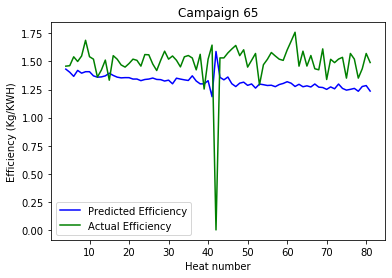

In [32]:
#Plots
camp = [65]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [40]:
df['Efficiency (MT/KWH)'][202]

0.0